ImportError: No module named ecmwfapi

In [2]:
target = "2t.grib"
print target

2t.grib


I get the data

### The data have been retrieved and saved in a grib file called 2t.grib
We will use gribapi to read the grib in a numpy array, and to extract the necessary information to georeference the  plot.

In [2]:
import Magics.macro as magics
import gribapi as grib 
import numpy as numpy 
import json 

In [3]:
target = "2t.grib"
file =  open(target)

#Getting the first  message from the file
field = grib.grib_new_from_file(file)

nj = grib.grib_get(field,"Nj")
ni = grib.grib_get(field,"Ni")

print ni, nj
metadata = { "paramId" : grib.grib_get(field,"paramId"),
             "units" : grib.grib_get(field,"units"),
             "typeOfLevel": grib.grib_get(field,"typeOfLevel"),  
             "marsType": grib.grib_get(field,"marsType"),  
             "marsClass": grib.grib_get(field,"marsClass"),  
             "marsStream": grib.grib_get_string(field,"marsStream"),
             "level": grib.grib_get(field,"level") } 

print metadata

2147483647 2560
{'typeOfLevel': 'surface', 'marsStream': 'oper', 'level': 0, 'marsClass': 'od', 'marsType': 'fc', 'units': 'K', 'paramId': 167}


In [6]:
firstlat = grib.grib_get(field, "latitudeOfFirstGridPointInDegrees")
steplat = -grib.grib_get(field, "jDirectionIncrementInDegrees")

firstlon = grib.grib_get(field, "longitudeOfFirstGridPointInDegrees")
steplon = grib.grib_get(field, "iDirectionIncrementInDegrees")

print "Latitude", firstlat, "Step", steplat
print "Longitude", firstlon, "Step", steplon

Latitude 90.0 Step -0.5
Longitude 0.0 Step 0.5


(361, 720)


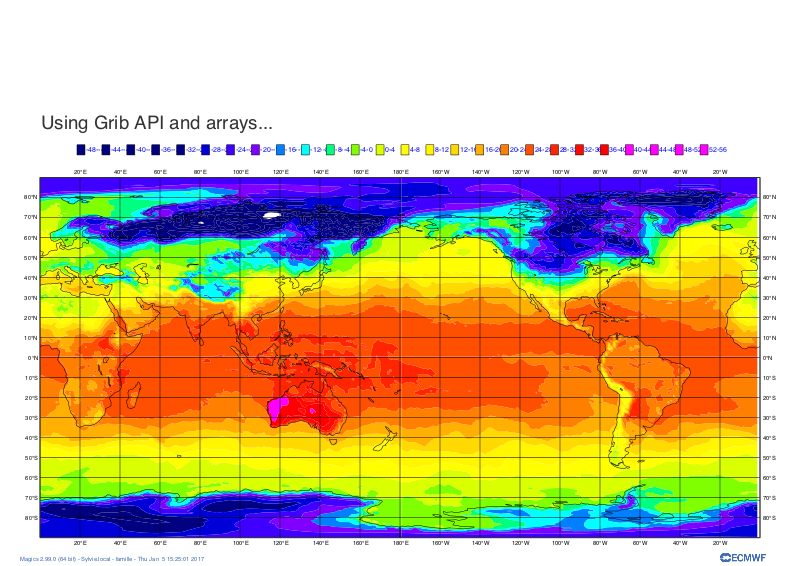

In [7]:
#Getting the field values
values = grib.grib_get_values(field).reshape(nj, ni)

data = magics.minput( input_field =   values,
                  input_field_initial_latitude = firstlat,
                  input_field_latitude_step = steplat,
                  input_field_initial_longitude = firstlon,
                  input_field_longitude_step = steplon,
                  input_mars_metadata = json.dumps(metadata),
                     )

#data = magics.mgrib(grib_input_file_name=target)
                     
#Setting the field contour 
contour = magics.mcont( 
                contour_shade=                   "on",
                legend=                          "on",
                contour_highlight = "off",
                contour_shade_method =           "area_fill",
                contour_shade_colour_direction = "clockwise",
                contour_shade_colour_method  =   "calculate",
                contour_shade_max_level_colour=  "red",
                contour_shade_min_level_colour= " blue")

#Setting the title
title = magics.mtext(text_lines=["<magics_title/>", "Using Grib API and arrays..."], 
            text_colour="charcoal",
            text_font_size='0.8',
            text_justification='left')

europe = magics.mmap(
      subpage_map_projection = "cylindrical",
      subpage_lower_left_latitude = -90.00,
      subpage_lower_left_longitude = 0.00,
      subpage_upper_right_latitude = 90.00,
      subpage_upper_right_longitude = 360.00
)
contour = magics.mcont(
    contour_automatic_setting="ecchart",
    legend="on"
)

legend = magics.mlegend( legend_display_type = "continuous")
#Plot the map
magics.plot( europe, data, contour, magics.mcoast(), title)

